Current centroids coordiante:[array([1., 1.]), array([5., 7.])]


Text(0, 0.5, 'y')

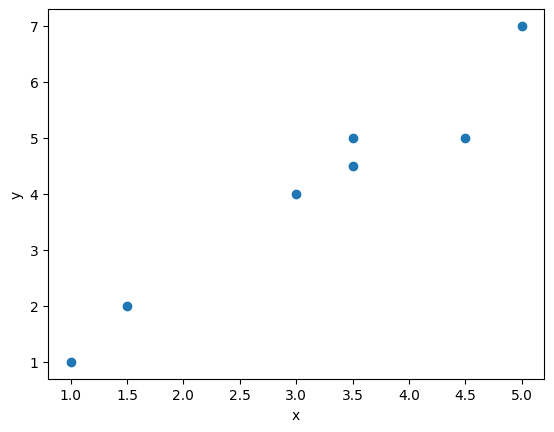

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Data
x = np.array([[1,1],[1.5,2],[3,4],[5,7],[3.5,5],[4.5,5],[3.5,4.5]])

dist_c1 = np.zeros(len(x)) #distance to centroid 1 (centroid 1 is the 'center' of cluster 1)
dist_c2 = np.zeros(len(x)) #distance to centroid 2 (centroid 2 is the 'center' of cluster 2)

centroid_assign = np.zeros(len(x)) # a list that indicate which datapoints belongs to which centroid

#the x-y coordinates for centroid 1 and 2
#this is initialized randomly
centroid =[x[0],x[3]]
print(f'Current centroids coordiante:{centroid}')

plt.scatter(x[:,0],x[:,1])
plt.xlabel('x')
plt.ylabel('y')


In [2]:
def euclid_distance(datapoints,centroid):

  return [math.dist(x,centroid) for x in datapoints]

def recalculate_centroid(centroid_assign,centroid_val):

  cluster_data = [x[idx] for idx,val in enumerate(centroid_assign) if val==centroid_val]

  #print(f'Datapoints for centroid {centroid_val} :{cluster_data}')

  return np.sum(cluster_data,axis=0)/len(cluster_data)

# 1.Calculate distance of all datapoints to centroids
print('Datapoints \n',x)
stop_flag = False

while (stop_flag==False):

  new_dist_c1 = euclid_distance(x,centroid[0])
  new_dist_c2 = euclid_distance(x,centroid[1])

  stop_flag = np.array_equal(new_dist_c1,dist_c1)

  if (stop_flag): #break the loop if the distance does not change
    print('---Centroids does not change----')
    break

  dist_c1 = new_dist_c1
  dist_c2 = new_dist_c2

  # 2.For each datapoint, assign a centroid that it is nearest to
  for idx,val in enumerate(dist_c1):
    if val<=dist_c2[idx]:
      centroid_assign[idx]=1
    else:
      centroid_assign[idx]=2

  print(f'Current centroid 1:{centroid[0]} centroid 2:{centroid[1]}')
  print('Datapoints distance to centroid 1',dist_c1)
  print('Datapoints distance to centroid 2',dist_c2)
  print('Assign centroid ',centroid_assign)



  # 3.Recalculate new centroids
  centroid[0] = recalculate_centroid(centroid_assign,1)
  centroid[1] = recalculate_centroid(centroid_assign,2)
  print(f'New centroids:{centroid} \n')




Datapoints 
 [[1.  1. ]
 [1.5 2. ]
 [3.  4. ]
 [5.  7. ]
 [3.5 5. ]
 [4.5 5. ]
 [3.5 4.5]]
Current centroid 1:[1. 1.] centroid 2:[5. 7.]
Datapoints distance to centroid 1 [0.0, 1.118033988749895, 3.605551275463989, 7.211102550927978, 4.716990566028302, 5.315072906367325, 4.301162633521313]
Datapoints distance to centroid 2 [7.211102550927978, 6.103277807866851, 3.605551275463989, 0.0, 2.5, 2.0615528128088303, 2.9154759474226504]
Assign centroid  [1. 1. 1. 2. 2. 2. 2.]
New centroids:[array([1.83333333, 2.33333333]), array([4.125, 5.375])] 

Current centroid 1:[1.83333333 2.33333333] centroid 2:[4.125 5.375]
Datapoints distance to centroid 1 [1.5723301886761007, 0.47140452079103173, 2.034425935955617, 5.639641438562877, 3.144660377352201, 3.7712361663282534, 2.733536577809454]
Datapoints distance to centroid 2 [5.376453291901642, 4.275657844121768, 1.776583800443987, 1.845602882529175, 0.7288689868556626, 0.5303300858899106, 1.0752906583803283]
Assign centroid  [1. 1. 2. 2. 2. 2. 2.]
New